<a href="https://colab.research.google.com/github/TRANQUOCHUY202/AI/blob/main/nhandang-flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# khai báo thư viện
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array


#Preprocessing để Training 
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
train_datagen = ImageDataGenerator( rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True )

# Tải các hình ảnh trong thư mục 'Training' và 'Test'
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BT1/5_Flowers/Training', 
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BT1/5_Flowers/Test', 
                                            target_size = (30,40), 
                                            batch_size = 32, 
                                            class_mode = 'categorical')
# In ra các chỉ số tương ứng cho các loại hoa trong tập huấn luyện và tập kiểm tra
training_set.class_indices
test_set.class_indices

Found 433 images belonging to 5 classes.
Found 27 images belonging to 5 classes.


{'Apricots': 0, 'Daisy': 1, 'Lotus': 2, 'Pink': 3, 'Rose': 4}

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

# Tạo model
model = Sequential()

#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 3
model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

#Làm phẳng
model.add(Flatten())
# ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                 

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Thiết lập thông số và optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Huấn luyện mô hình với callbacks
a = model.fit_generator(training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), 
                              validation_steps=len(test_set))


<ipython-input-23-5aa7282360ba>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator(training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set),


Epoch 1/80
14/14 [==============================] - 5s 337ms/step - loss: 0.6376 - accuracy: 0.7506 - val_loss: 0.9572 - val_accuracy: 0.6296
Epoch 2/80
14/14 [==============================] - 5s 360ms/step - loss: 0.4810 - accuracy: 0.8430 - val_loss: 0.9279 - val_accuracy: 0.6667
Epoch 3/80
14/14 [==============================] - 5s 379ms/step - loss: 0.4708 - accuracy: 0.8245 - val_loss: 1.0300 - val_accuracy: 0.6667
Epoch 4/80
14/14 [==============================] - 6s 431ms/step - loss: 0.3962 - accuracy: 0.8591 - val_loss: 0.7697 - val_accuracy: 0.7037
Epoch 5/80
14/14 [==============================] - 5s 328ms/step - loss: 0.3293 - accuracy: 0.8868 - val_loss: 0.7489 - val_accuracy: 0.8148
Epoch 6/80
14/14 [==============================] - 4s 297ms/step - loss: 0.3159 - accuracy: 0.8938 - val_loss: 0.8549 - val_accuracy: 0.7778
Epoch 7/80
14/14 [==============================] - 6s 404ms/step - loss: 0.3623 - accuracy: 0.8522 - val_loss: 0.9946 - val_accuracy: 0.6667
Epoch 

In [ ]:
# đánh giá mô hình
test_loss, test_acc = model.evaluate(test_set, verbose=False)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.9605116844177246
Test accuracy: 0.8518518805503845


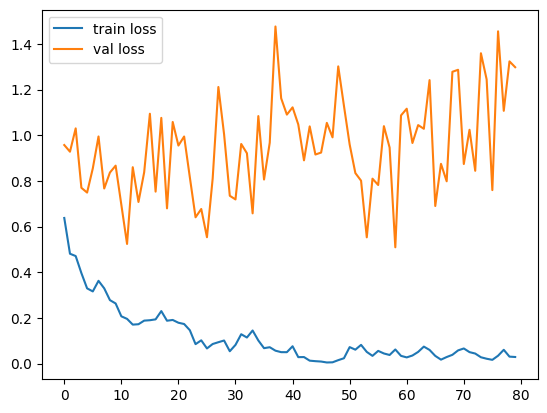

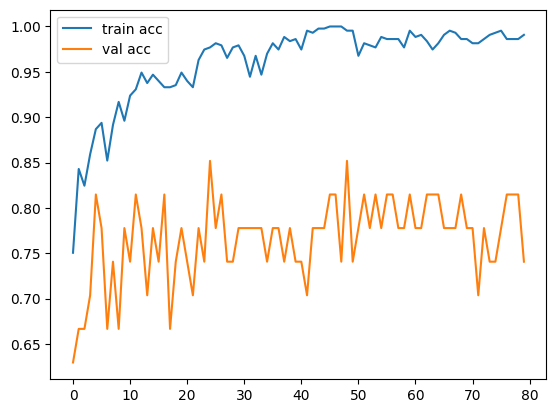

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Lưu file .h5
model.save('/content/drive/MyDrive/BT1/5_Flowers/model_flower.h5')

In [ ]:
#cho phép truy cập các file trong thư mục Valid
import os
os.chdir('/content/drive/MyDrive/BT1/5_Flowers/Valid')

{'Apricots': 0, 'Daisy': 1, 'Lotus': 2, 'Pink': 3, 'Rose': 4}

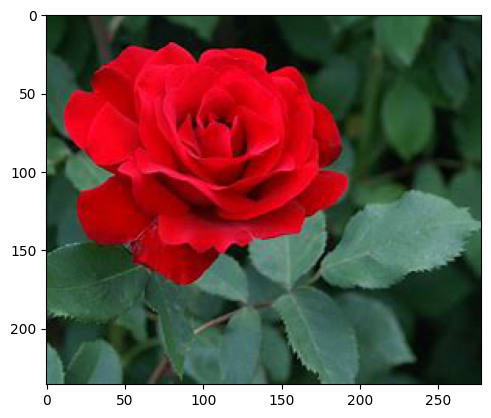

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical, load_img, img_to_array
img_data = load_img('/content/drive/MyDrive/BT1/5_Flowers/Valid/Anh1.jpg')
img_data = img_to_array(img_data)
plt.imshow(img_data/255)
training_set.class_indices

Chọn image : Anh3
1/1 [==============================] - 0s 28ms/step
[[0. 0. 1. 0. 0.]]
Lotus
Chọn image : Anh5
1/1 [==============================] - 0s 26ms/step
[[0. 0. 0. 1. 0.]]
Pink
Chọn image : a6
Tên của hình ảnh không tồn tại 
Chọn image : Anh1
1/1 [==============================] - 0s 27ms/step
[[0. 0. 0. 0. 1.]]
Rose
Chọn image : -


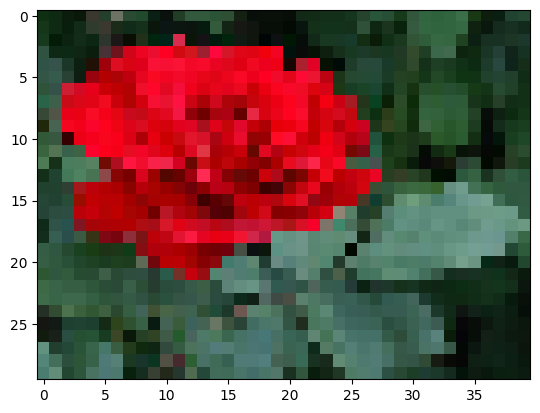

In [ ]:
import numpy as np
from keras.preprocessing import image
#Tạo vòng lặp
while 1 :
 nh = input('Chọn' ' image : ')
 #nhập dấu "-" thì thoát khỏi vòng lặp
 if (nh=='-'): 
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/BT1/5_Flowers/Valid/{}.jpg".format(nh),
                             target_size=(30,40)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     result = model.predict(test_image)
     training_set.class_indices
     print(result)
     x=0
     c=0
     i=0
     while (i<5):
       #kiểm tra nếu xác suất dự đoán của lớp thứ i lớn hơn hoặc bằng x 
       #thì gán x bằng xác suất dự đoán của lớp đó và c là chỉ số của lớp đó.
       if result[0][i]>=x:
         x=result[0][i]
         c=i
        
       i=i+1
     if (x<=0 and c>=5) :
         c=5
     if c == 0:
       prediction = 'Apricots'
     elif c == 1:
       prediction = 'Daisy'
     elif c == 2:
       prediction = 'Lotus'
     elif c == 3:
       prediction = 'Pink'
     elif c == 4:
       prediction = 'Rose'
           
     print(prediction)
   except:
      print('Tên của hình ảnh không tồn tại '  )